https://medium.com/grupo-32/an%C3%A1lise-sobre-a-exporta%C3%A7%C3%A3o-de-vinhos-no-brasil-0d9858104c67


https://www.oiv.int/what-we-do/data-discovery-report?oiv

http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2009&opcao=opt_06&subopcao=subopt_01

https://medium.com/p/4e873dd15461/edit

In [36]:
import requests

# URL do arquivo CSV
url = 'http://vitibrasil.cnpuv.embrapa.br/download/ExpVinho.csv'


# Caminho local onde o arquivo CSV será salvo
local_filename = 'ExpVinho.csv'

# Fazendo a requisição GET para obter o conteúdo do arquivo
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Abrindo um arquivo no modo de escrita binária para salvar o conteúdo
    with open(local_filename, 'wb') as file:
        file.write(response.content)
    print(f"Arquivo salvo com sucesso como {local_filename}")
else:
    print(f"Erro ao baixar o arquivo: {response.status_code}")

Arquivo salvo com sucesso como ExpVinho.csv


In [37]:
dolar = 'https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial=%2701-01-2009%27&@dataFinalCotacao=%2712-31-2023%27&$format=text/csv&$select=cotacaoCompra,cotacaoVenda,dataHoraCotacao'


# Caminho local onde o arquivo CSV será salvo
local_filename = 'CotacaoDolar.csv'

# Fazendo a requisição GET para obter o conteúdo do arquivo
response = requests.get(dolar)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Abrindo um arquivo no modo de escrita binária para salvar o conteúdo
    with open(local_filename, 'wb') as file:
        file.write(response.content)
    print(f"Arquivo salvo com sucesso como {local_filename}")
else:
    print(f"Erro ao baixar o arquivo: {response.status_code}")

Arquivo salvo com sucesso como CotacaoDolar.csv


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [39]:
dados_exportacao = pd.read_csv('ExpVinho.csv', sep=';')

In [40]:
dados_exportacao = dados_exportacao.drop("Id", axis=1)

In [41]:
dados_exportacao.head()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,Angola,0,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dados_exportacao.tail()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
132,Tuvalu,0,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,0,0
133,Uruguai,0,0,0,0,0,0,0,0,0,...,6180,18497,0,0,136774,149842,637117,997367,326093,454271
134,Vanuatu,0,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
135,Venezuela,0,0,3200,2000,1350,750,11700,6458,9830,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512
136,Vietnã,0,0,0,0,0,0,0,0,0,...,20,32,86,584,0,0,130,277,72,128


In [43]:
# Usando o melt para transformar as colunas de anos em linhas
dados_exportacao = pd.melt(dados_exportacao, id_vars=['País'], var_name='Ano', value_name='Valor')

# Extraindo o tipo (Qtd ou Valor) com base no sufixo das colunas
dados_exportacao['Tipo'] = dados_exportacao['Ano'].apply(lambda x: 'Qtd' if '.1' not in x else 'Valor')

# Limpando a coluna 'Ano' para remover o sufixo '.1'
dados_exportacao['Ano'] = dados_exportacao['Ano'].str.replace('.1', '')

# Pivotando os dados para ter colunas separadas de 'Qtd' e 'Valor'
dados_exportacao = dados_exportacao.pivot_table(index=['País', 'Ano'], columns='Tipo', values='Valor').reset_index()

# Verificando e tratando casos onde 'Qtd' é zero para evitar divisão por zero
dados_exportacao['US$'] = np.where(dados_exportacao['Qtd'] == 0, np.nan, dados_exportacao['Valor'] / dados_exportacao['Qtd'])

#Filtrando o ano a partir de 2009
dados_exportacao = dados_exportacao[dados_exportacao['Ano'] >= '2009']

# Exibindo o DataFrame final
print(dados_exportacao)

Tipo         País   Ano  Qtd  Valor        US$
39    Afeganistão  2009  0.0    0.0        NaN
40    Afeganistão  2010  0.0    0.0        NaN
41    Afeganistão  2011  0.0    0.0        NaN
42    Afeganistão  2012  0.0    0.0        NaN
43    Afeganistão  2013  0.0    0.0        NaN
...           ...   ...  ...    ...        ...
7393      Áustria  2019  0.0    0.0        NaN
7394      Áustria  2020  0.0    0.0        NaN
7395      Áustria  2021  0.0    0.0        NaN
7396      Áustria  2022  6.0  212.0  35.333333
7397      Áustria  2023  0.0    0.0        NaN

[2055 rows x 5 columns]


In [9]:
# # Criando uma lista de dicionários para armazenar os dados estruturados
# data_structured = []

# # Iterando sobre cada linha do DataFrame
# for index, row in dados_exportacao.iterrows():
#     país = row['País']
#     for year in range(1970, 2024):
#         qtd = row[f'{year}']
#         valor = row[f'{year}.1']
#         data_structured.append({'País': país, 'Ano': year, 'Qtd': qtd, 'Valor': valor})

# # Criando o novo DataFrame estruturado
# dados_exportacao_structured = pd.DataFrame(data_structured)

# # Exibindo o resultado
# print(dados_exportacao_structured)

In [10]:
dados_exportacao.describe()

Tipo,Qtd,Valor,US$
count,2.055000e+03,2.055000e+03,743.000000
mean,4.047445e+04,5.569309e+04,4.415867
std,5.667408e+05,4.935699e+05,4.174296
min,0.000000e+00,0.000000e+00,0.222222
25%,0.000000e+00,0.000000e+00,1.899176
50%,0.000000e+00,0.000000e+00,3.664688
75%,7.915000e+02,3.223000e+03,5.361238
max,2.191291e+07,1.479569e+07,58.000000


In [11]:
dados_exportacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 39 to 7397
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   País    2055 non-null   object 
 1   Ano     2055 non-null   object 
 2   Qtd     2055 non-null   float64
 3   Valor   2055 non-null   float64
 4   US$     743 non-null    float64
dtypes: float64(3), object(2)
memory usage: 96.3+ KB


https://www.winesbrazil.org/images/banner01-pt.png

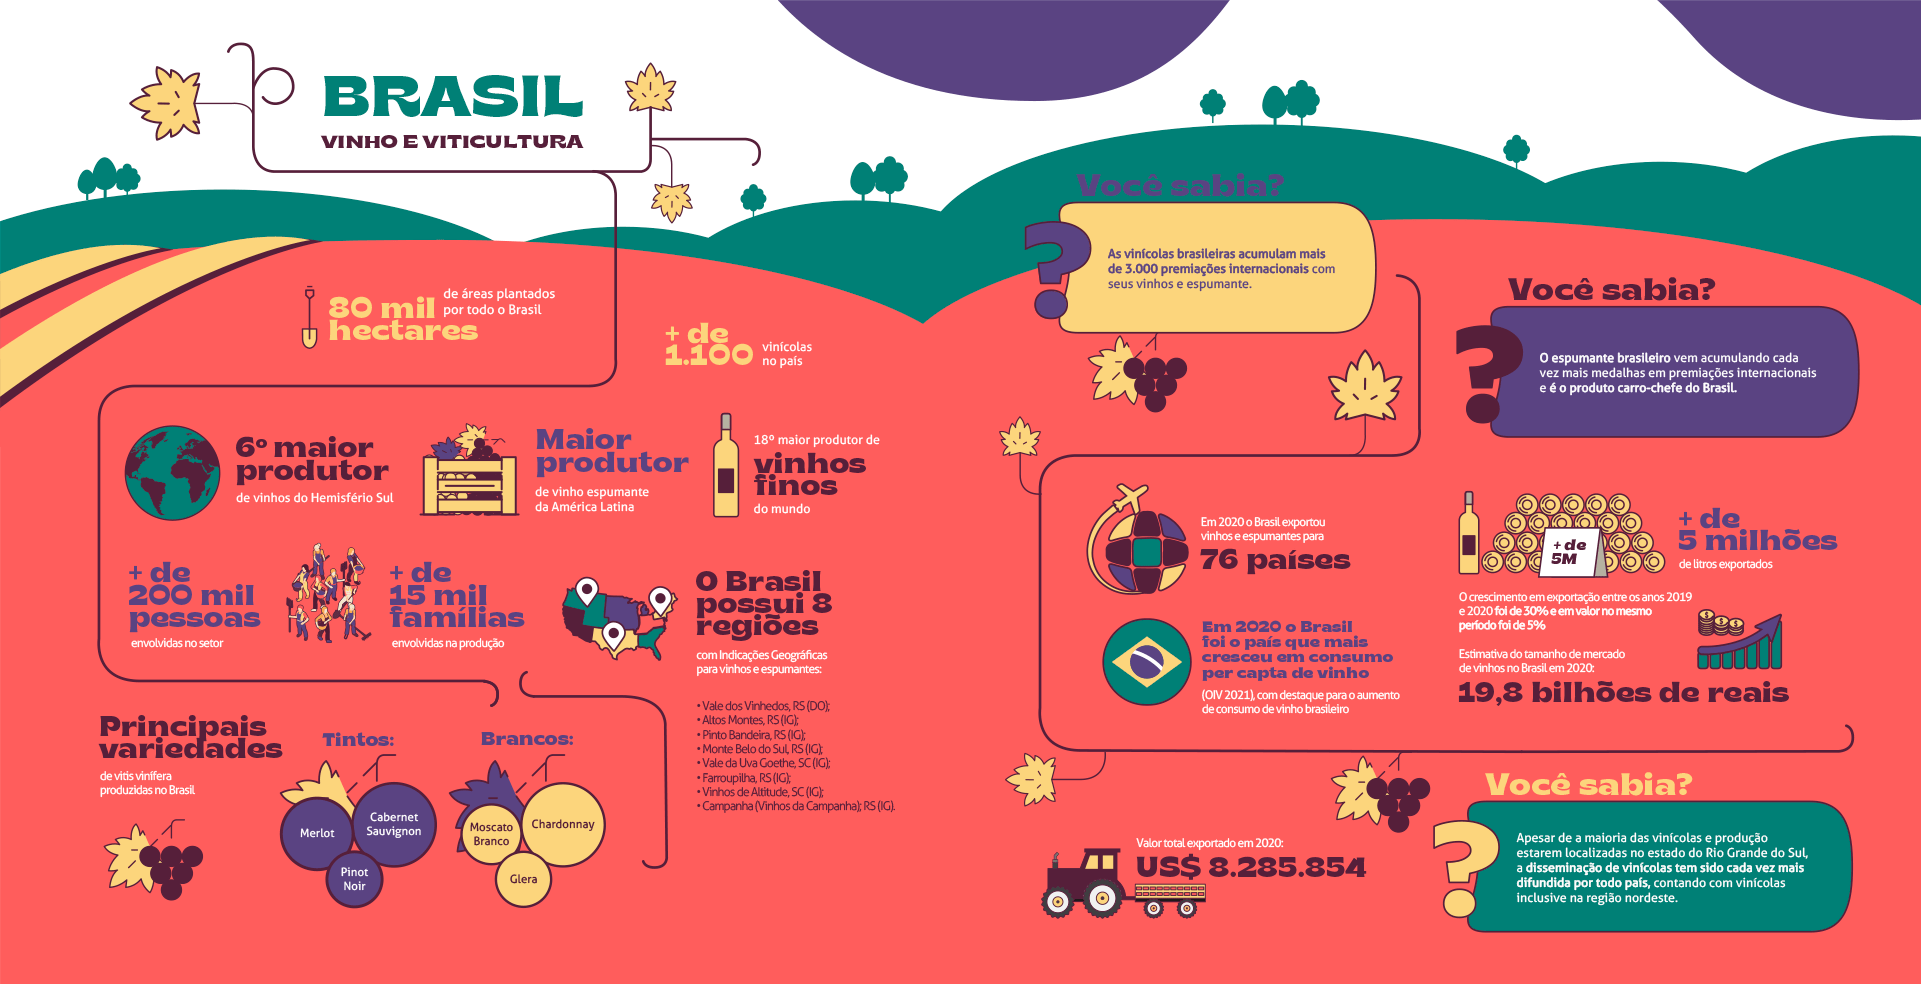

#Valor e Qtd Exportado por Ano

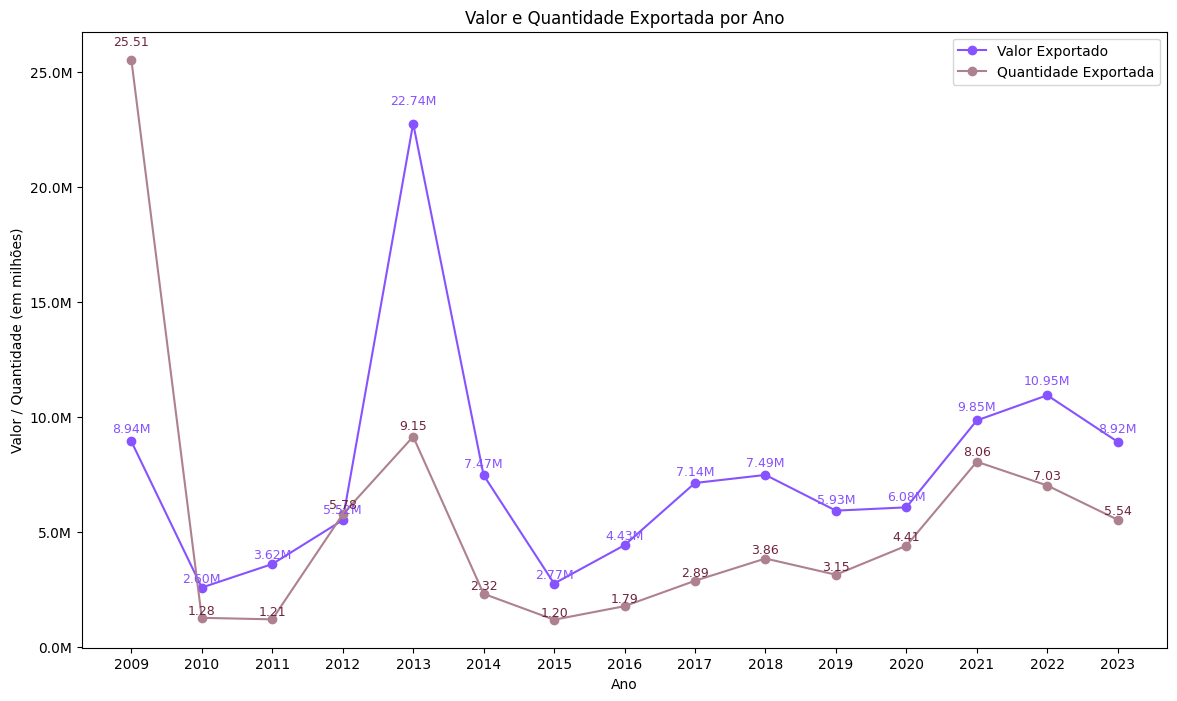

In [12]:

# Agrupar os dados por 'Ano' e somar os valores de 'Valor' e 'Qtd'
dados_agrupados = dados_exportacao.groupby('Ano').agg({'Valor': 'sum', 'Qtd': 'sum'}).reset_index()

# Certificar-se de que a coluna 'Ano' está apenas com o ano e é do tipo inteiro
# Caso seja uma coluna datetime, extraímos apenas o ano
if pd.api.types.is_datetime64_any_dtype(dados_agrupados['Ano']):
    dados_agrupados['Ano'] = dados_agrupados['Ano'].dt.year

# Ordenar os dados por 'Ano' em ordem crescente
dados_agrupados = dados_agrupados.sort_values(by='Ano')

# 1. Gráfico de linha que mostra o valor e a quantidade exportada por ano
plt.figure(figsize=(14, 8))

# Plotar a linha para 'Valor'
plt.plot(dados_agrupados['Ano'], dados_agrupados['Valor'], marker='o', color='#8752ff', label='Valor Exportado')

# Adicionar rótulos de dados para 'Valor'
for i, value in enumerate(dados_agrupados['Valor']):
    plt.text(dados_agrupados['Ano'][i], value + value * 0.03, f'{value/1e6:.2f}M', ha='center', va='bottom', color='#8752ff', fontsize=9)

# Plotar a linha para 'Qtd'
plt.plot(dados_agrupados['Ano'], dados_agrupados['Qtd'], marker='o', color='#ad818d', label='Quantidade Exportada')

# Adicionar rótulos de dados para 'Qtd'
for i, qtd in enumerate(dados_agrupados['Qtd']):
    plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Adicionar título e rótulos
plt.title('Valor e Quantidade Exportada por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor / Quantidade (em milhões)')
plt.legend()

# Ajustar o eixo y para mostrar em milhões
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

# Ajustar o eixo x para mostrar todos os anos
anos = dados_agrupados['Ano'].unique()
plt.xticks(anos)

# Mostrar o gráfico
plt.show()





#Valores Exportados por País

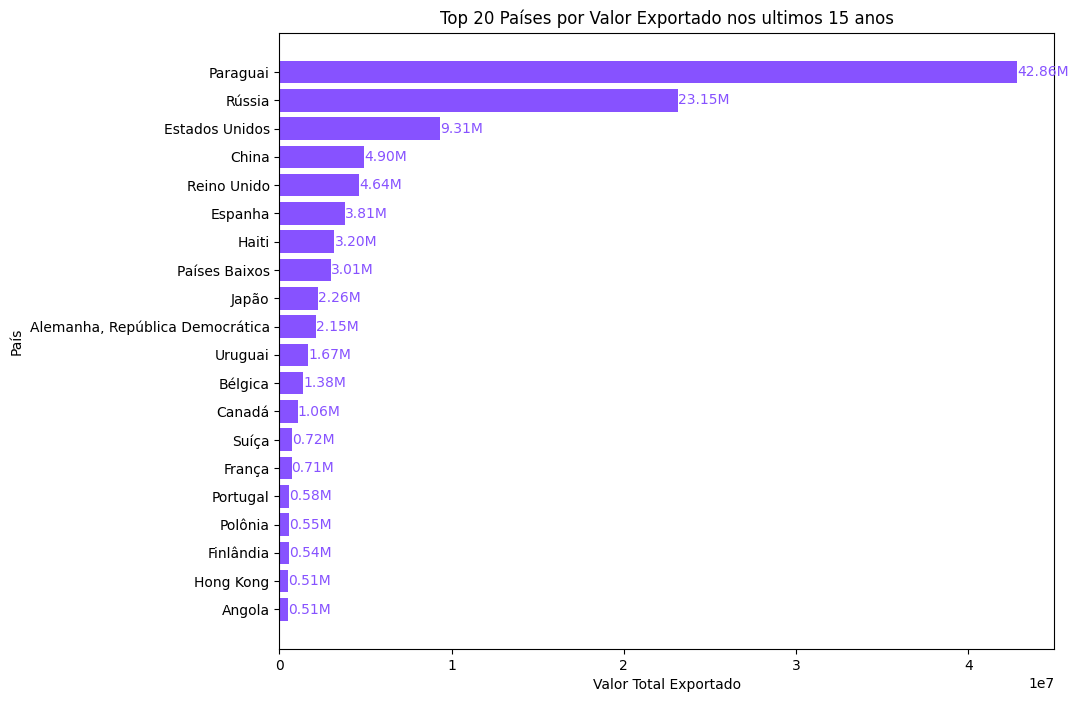

In [13]:
# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao.groupby('País')['Valor'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Valor Exportado nos ultimos 15 anos')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center', ha='left', color='#8752ff')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()


#Qtd Exportadas por País

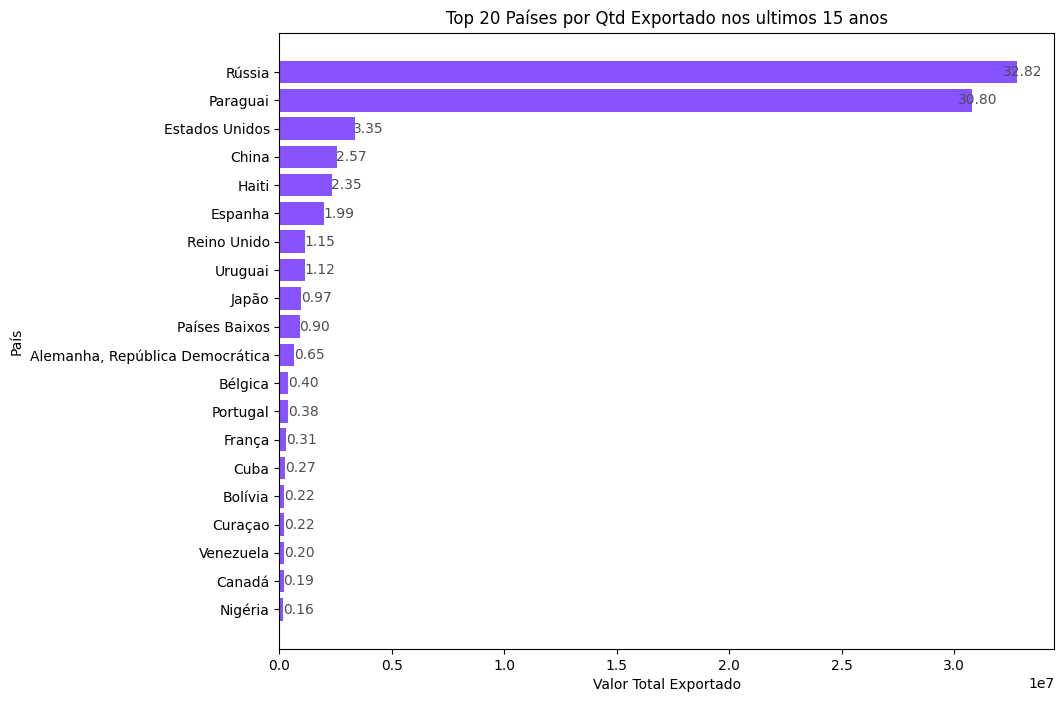

In [14]:
# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao.groupby('País')['Qtd'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Qtd Exportado nos ultimos 15 anos')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value + value * -0.02 , index, f'{value/1e6:.2f}', va='center', ha='left', color='#4e4e4e')

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

#Analisando os dados Ano de 2013

In [15]:
#Filtrando o ano a partir de 2009
dados_exportacao_2013 = dados_exportacao[dados_exportacao['Ano'] == '2013']

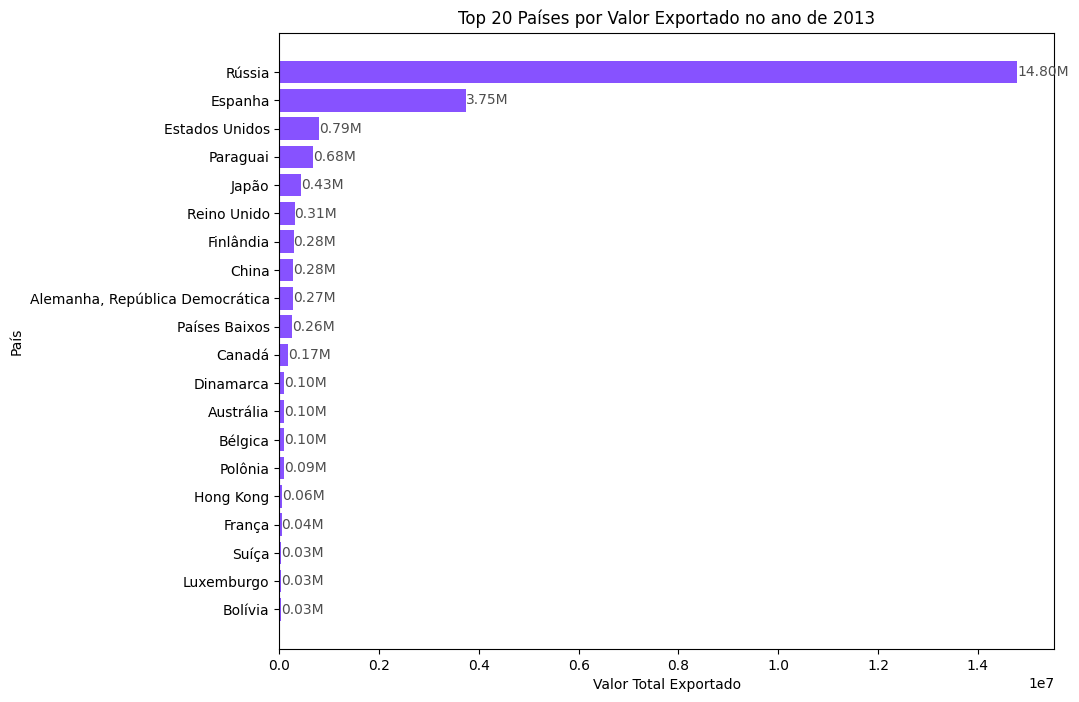

In [16]:
import matplotlib.pyplot as plt

# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_2013.groupby('País')['Valor'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Valor Exportado no ano de 2013')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center', ha='left', color='#4e4e4e')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

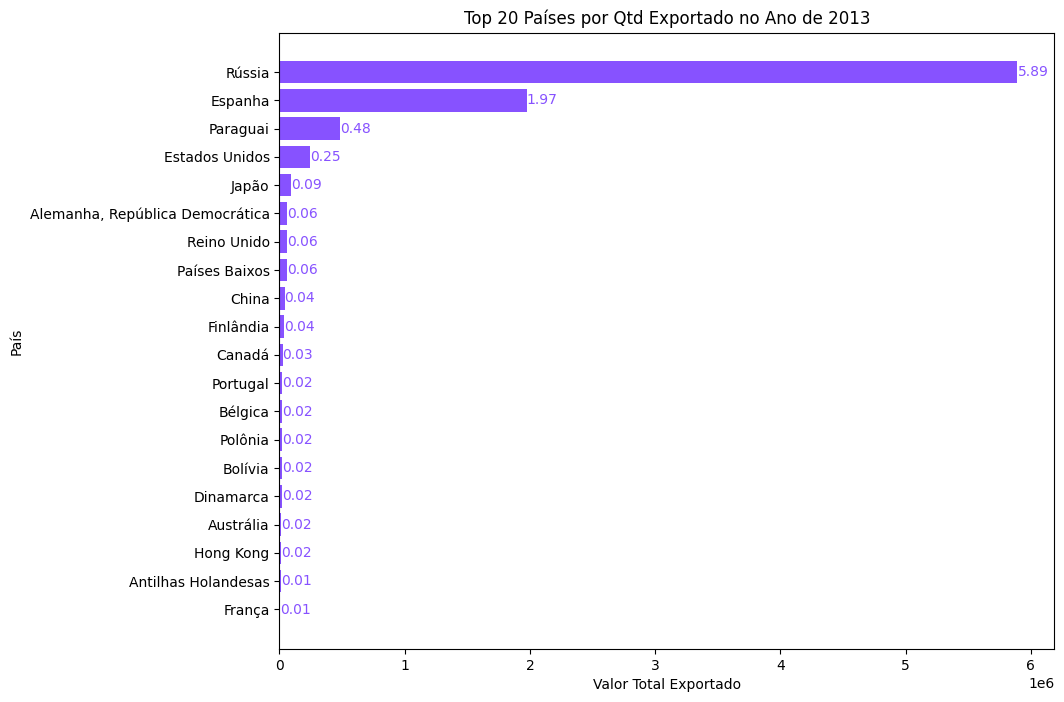

In [17]:
# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_2013.groupby('País')['Qtd'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Qtd Exportado no Ano de 2013')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}', va='center', ha='left', color='#8752ff')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

#Analisando os dados Ano de 2010

In [18]:
#Filtrando o ano a partir de 2009
dados_exportacao_2009 = dados_exportacao[dados_exportacao['Ano'] == '2009']

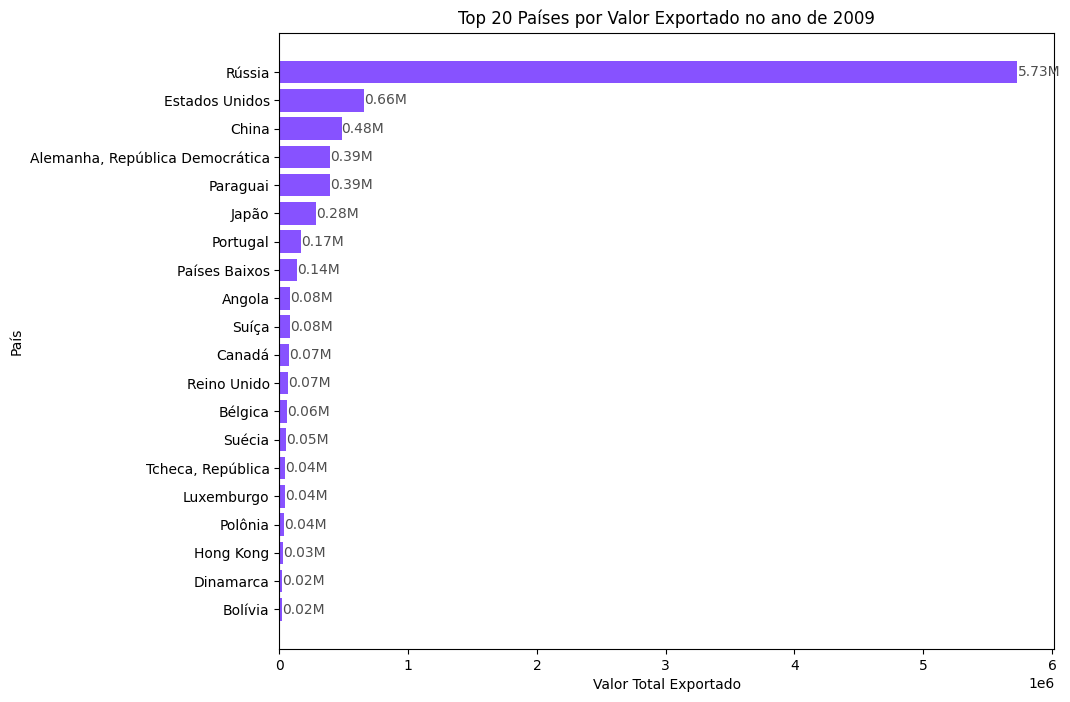

In [19]:
import matplotlib.pyplot as plt

# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_2009.groupby('País')['Valor'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Valor Exportado no ano de 2009')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center', ha='left', color='#4e4e4e')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

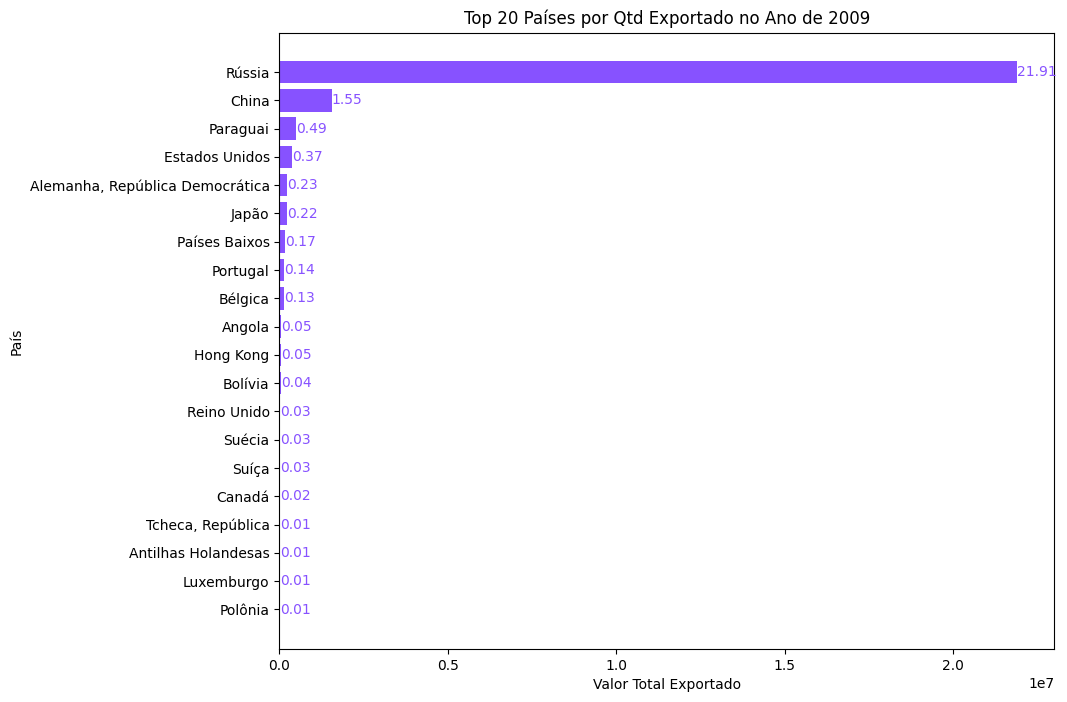

In [20]:
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_2009.groupby('País')['Qtd'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Qtd Exportado no Ano de 2009')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}', va='center', ha='left', color='#8752ff')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

#Exportações de Vinho a partir de 2014

In [21]:
#Filtrando o ano a partir de 2014
dados_exportacao_partir_2014 = dados_exportacao[dados_exportacao['Ano'] >= '2014']

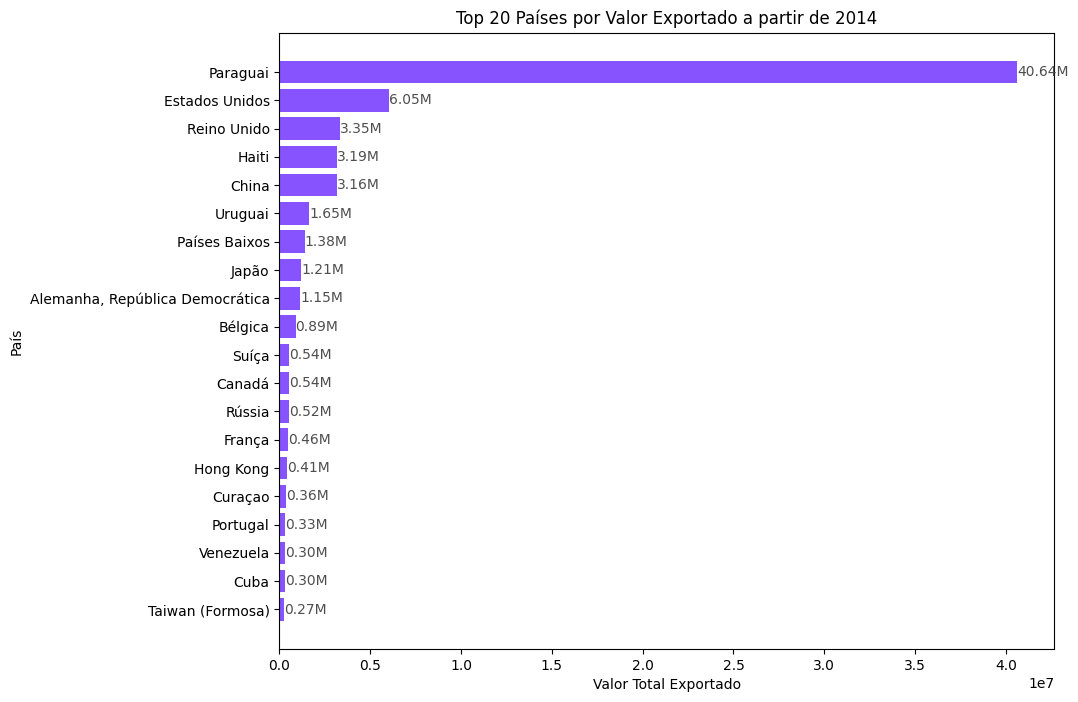

In [22]:
import matplotlib.pyplot as plt

# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_partir_2014.groupby('País')['Valor'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Valor Exportado a partir de 2014')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center', ha='left', color='#4e4e4e')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

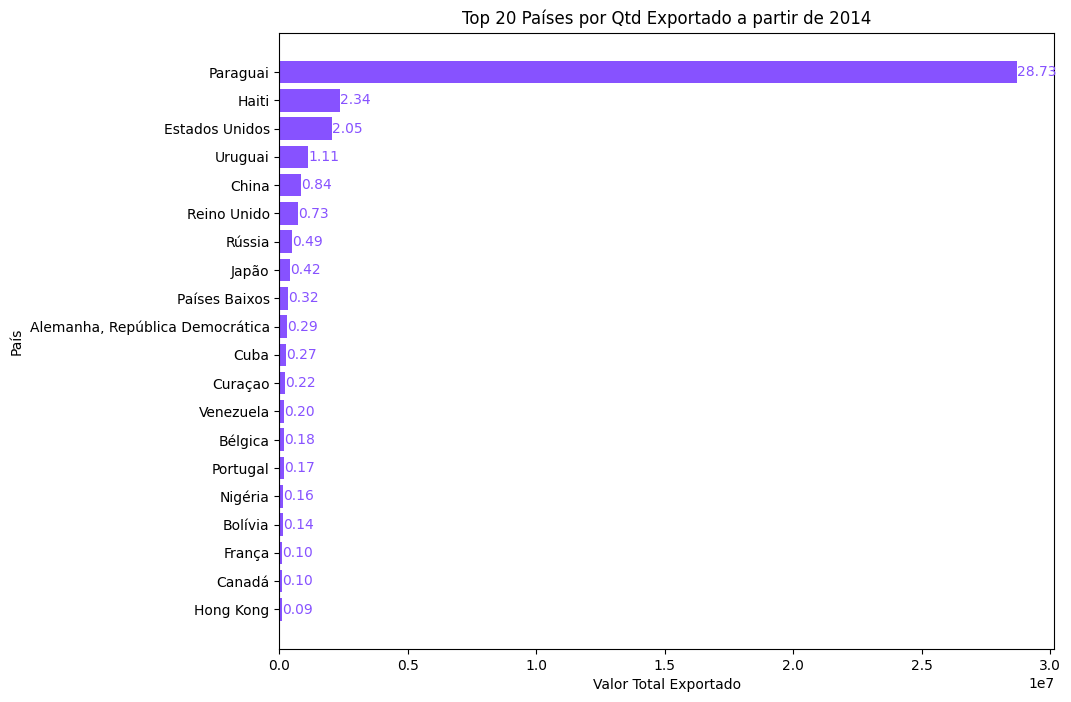

In [23]:
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_partir_2014.groupby('País')['Qtd'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_20_paises = valor_por_pais.head(20)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 20 Países por Qtd Exportado a partir de 2014')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}', va='center', ha='left', color='#8752ff')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

In [24]:
#Exportações de Vinho nos ultimos 5 anos

In [25]:
dados_exportacao_partir_2019 = dados_exportacao[dados_exportacao['Ano'] >= '2019']

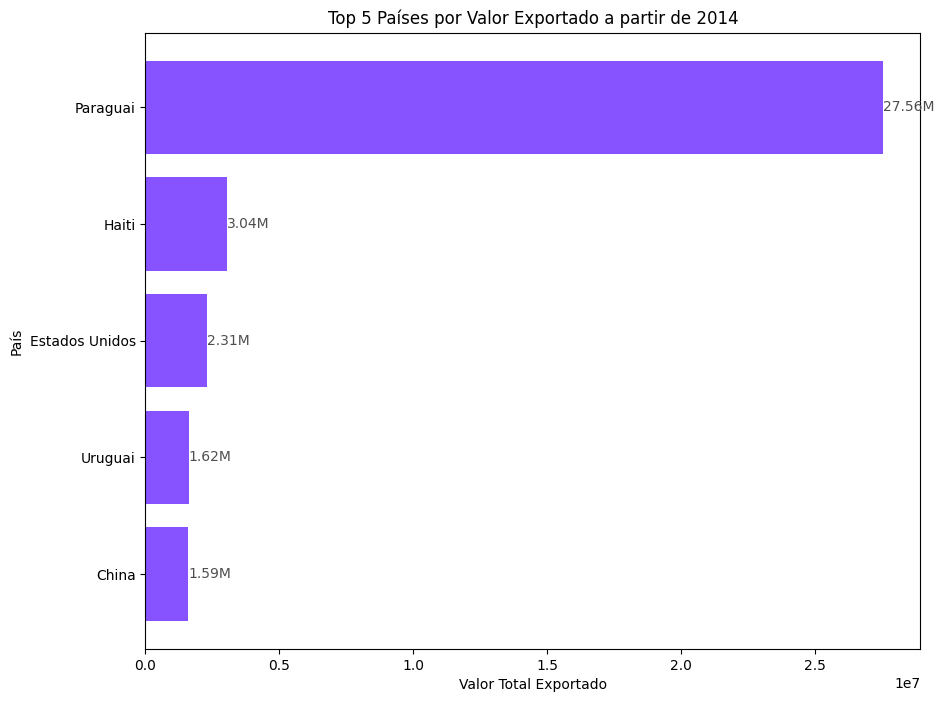

In [26]:
import matplotlib.pyplot as plt

# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_partir_2019.groupby('País')['Valor'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_5_paises = valor_por_pais.head(5)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_5_paises.index, top_5_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 5 Países por Valor Exportado a partir de 2014')
plt.xlabel('Valor Total Exportado')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_5_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center', ha='left', color='#4e4e4e')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

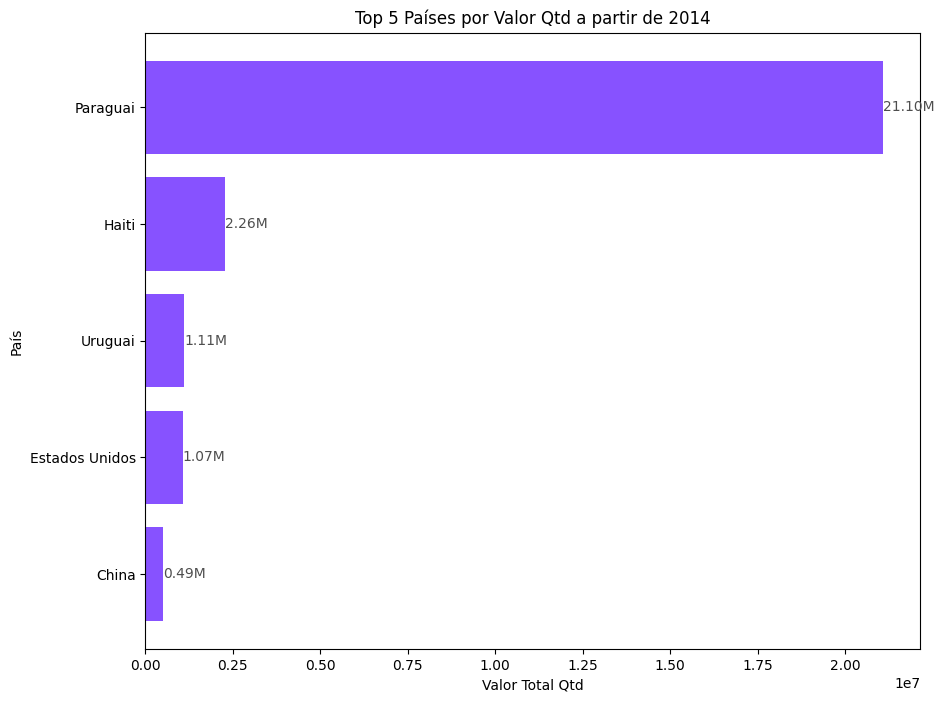

In [27]:
import matplotlib.pyplot as plt

# 2. Gráfico de barra horizontal que mostra o valor exportado por País
# Agrupar os dados por país e somar os valores
valor_por_pais = dados_exportacao_partir_2019.groupby('País')['Qtd'].sum().sort_values(ascending=False)

# Selecionar apenas os top 20 países que mais exportaram
top_5_paises = valor_por_pais.head(5)

plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_5_paises.index, top_5_paises.values, color='#8752ff')

# Adicionar título e rótulos
plt.title('Top 5 Países por Valor Qtd a partir de 2014')
plt.xlabel('Valor Total Qtd')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_5_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center', ha='left', color='#4e4e4e')

# # Adicionar rótulos de dados para 'Qtd'
# for i, value in enumerate(top_20_paises.values)):
#     plt.text(dados_agrupados['Ano'][i], qtd + qtd * 0.02, f'{qtd/1e6:.2f}M', ha='center', va='bottom', color='#6f243e', fontsize=9)

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()

#Informações sobre o  Cotacao Dolar

In [28]:
dados_cotacao = pd.read_csv('CotacaoDolar.csv', sep=',')

In [29]:
dados_cotacao.head()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,"2,329","2,3298",2009-01-02 17:48:00.0
1,"2,2772","2,278",2009-01-05 17:41:00.0
2,"2,1881","2,1889",2009-01-06 17:33:00.0
3,"2,2166","2,2174",2009-01-07 17:34:00.0
4,"2,2675","2,2683",2009-01-08 17:32:00.0


In [30]:
# Convertendo a coluna 'dataHoraCotacao' para o tipo datetime
dados_cotacao['dataHoraCotacao'] = pd.to_datetime(dados_cotacao['dataHoraCotacao'])

# Extraindo a data e a hora para novas colunas
dados_cotacao['data'] = dados_cotacao['dataHoraCotacao'].dt.date
dados_cotacao['Ano'] = dados_cotacao['dataHoraCotacao'].dt.year


# Substituindo vírgula por ponto para garantir que o formato esteja correto para conversão
dados_cotacao['cotacaoCompra'] = dados_cotacao['cotacaoCompra'].str.replace(',', '.')
dados_cotacao['cotacaoVenda'] = dados_cotacao['cotacaoVenda'].str.replace(',', '.')

# Convertendo as colunas para o tipo float
dados_cotacao['cotacaoCompra'] = dados_cotacao['cotacaoCompra'].astype(float)
dados_cotacao['cotacaoVenda'] = dados_cotacao['cotacaoVenda'].astype(float)

In [31]:
dados_cotacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cotacaoCompra    3764 non-null   float64       
 1   cotacaoVenda     3764 non-null   float64       
 2   dataHoraCotacao  3764 non-null   datetime64[ns]
 3   data             3764 non-null   object        
 4   Ano              3764 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 132.5+ KB


In [32]:
dados_cotacao.describe()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao,Ano
count,3764.000000,3764.000000,3764,3764.000000
mean,3.346557,3.347203,2016-07-01 07:43:29.939123968,2015.996281
min,1.533700,1.534500,2009-01-02 17:48:00,2009.000000
25%,2.040375,2.040975,2012-09-30 19:08:07.283500032,2012.000000
50%,3.234850,3.235450,2016-06-30 01:11:20.292999936,2016.000000
75%,4.725600,4.726200,2020-03-30 19:08:36.594500096,2020.000000
max,5.936600,5.937200,2023-12-29 10:04:11.873000,2023.000000
std,1.324428,1.324387,NaN,4.318257


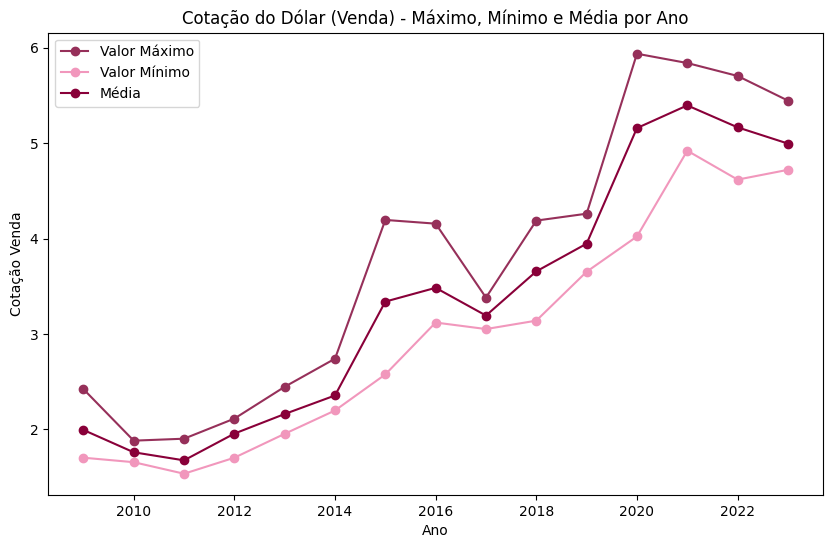

In [33]:
# Agrupando por ano e calculando o valor máximo, mínimo e a média de 'cotacaoVenda'
cotacao_ano = dados_cotacao.groupby('Ano')['cotacaoVenda'].agg(['max', 'min', 'mean']).reset_index()


# Renomeando as colunas para maior clareza
cotacao_ano.columns = ['Ano', 'Max', 'Min', 'Media']

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(cotacao_ano['Ano'], cotacao_ano['Max'], marker='o', color='#96305A', label='Valor Máximo')
plt.plot(cotacao_ano['Ano'], cotacao_ano['Min'], marker='o', color='#F197BC', label='Valor Mínimo')
plt.plot(cotacao_ano['Ano'], cotacao_ano['Media'], marker='o', color='#890039', label='Média')

# Adicionando títulos e legendas
plt.title('Cotação do Dólar (Venda) - Máximo, Mínimo e Média por Ano')
plt.xlabel('Ano')
plt.ylabel('Cotação Venda')
plt.legend()
plt.show()

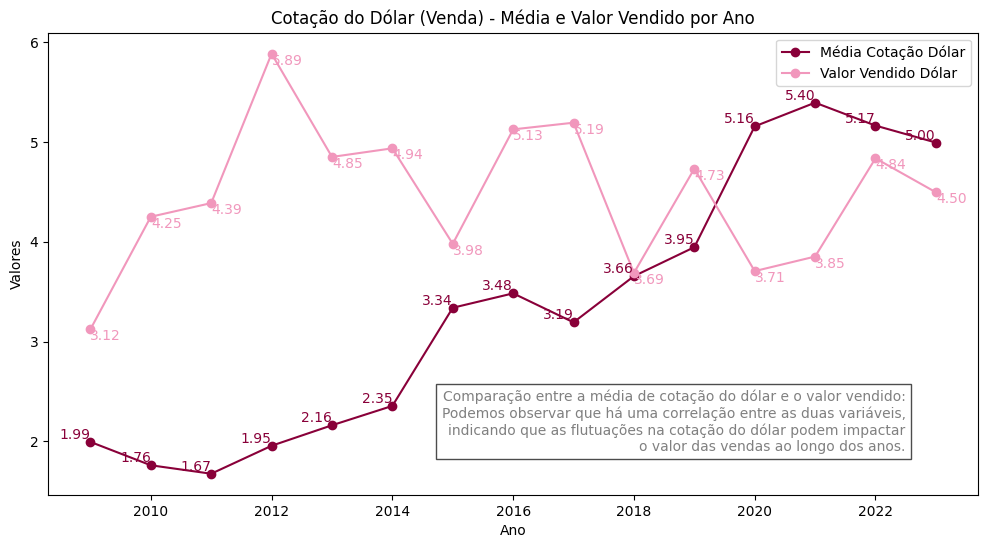

In [34]:
# Convertendo as colunas 'Ano' para o mesmo tipo (int)
dados_cotacao['Ano'] = dados_cotacao['Ano'].astype(int)
dados_exportacao['Ano'] = dados_exportacao['Ano'].astype(int)

# Agrupando por ano e calculando o valor médio de 'cotacaoVenda'
cotacao_ano = dados_cotacao.groupby('Ano')['cotacaoVenda'].agg(['mean']).reset_index()

# Agrupando por ano para calcular a média do 'US$'
valor_vendido_ano = dados_exportacao.groupby('Ano').agg({'US$': 'mean'}).reset_index()

# Mesclando os DataFrames
cotacao_ano = pd.merge(cotacao_ano, valor_vendido_ano, on='Ano')

# Renomeando as colunas para maior clareza
cotacao_ano.columns = ['Ano', 'Media', 'ValorVendido']

# Plotando o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(cotacao_ano['Ano'], cotacao_ano['Media'], marker='o', color='#890039', label='Média Cotação Dólar')
plt.plot(cotacao_ano['Ano'], cotacao_ano['ValorVendido'], marker='o', color='#F197BC', label='Valor Vendido Dólar')  # Usando uma cor diferente

# Adicionando rótulos de dados
for i, row in cotacao_ano.iterrows():
    plt.text(row['Ano'], row['Media'], f'{row["Media"]:.2f}', color='#890039', ha='right', va='bottom')
    plt.text(row['Ano'], row['ValorVendido'], f'{row["ValorVendido"]:.2f}', color='#F197BC', ha='left', va='top')

# Adicionando um texto explicativo dentro do gráfico, no canto inferior direito
texto_comparativo = ("Comparação entre a média de cotação do dólar e o valor vendido:\n"
                     "Podemos observar que há uma correlação entre as duas variáveis,\n"
                     "indicando que as flutuações na cotação do dólar podem impactar\n"
                     "o valor das vendas ao longo dos anos.")
plt.text(cotacao_ano['Ano'].max() - 0.5, cotacao_ano['Media'].min() + 0.2, texto_comparativo,
         fontsize=10, color='gray', ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.7))

# Adicionando títulos e legendas
plt.title('Cotação do Dólar (Venda) - Média e Valor Vendido por Ano')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.show()


#Analisando os dados mundiais de exportação de vinho do ano 2023

In [35]:
dados_mundiais = pd.read_csv('data.csv', sep=',')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
dados_mundiais.head()

In [ ]:
import pandas as pd

# Remover espaços e caracteres indesejados na coluna 'Quantity'
dados_mundiais['Quantity'] = dados_mundiais['Quantity'].str.replace(r'\xa0', '', regex=True)  # Remove caracteres \xa0
dados_mundiais['Quantity'] = dados_mundiais['Quantity'].str.replace(' ', '')  # Remove espaços comuns

# Remover valores não numéricos da coluna 'Unit' e ajustar os valores
dados_mundiais['Unit'] = dados_mundiais['Unit'].str.replace(r'\xa0', '', regex=True)  # Remove caracteres \xa0
dados_mundiais['Unit'] = dados_mundiais['Unit'].replace({'ha': 1.0, '1000hl': 100000})  # Ajustar unidade para valores numéricos

# Converter a coluna 'Quantity' para float
dados_mundiais['Quantity'] = pd.to_numeric(dados_mundiais['Quantity'], errors='coerce')

dados_mundiais['Quantity'] = dados_mundiais['Quantity'] * dados_mundiais['Unit']

# Visualizando as primeiras linhas para verificar as alterações
print(dados_mundiais.head())


In [ ]:
dados_mundiais.info()

In [ ]:
dados_mundiais_2023 = dados_mundiais[dados_mundiais['Variable'] == 'Exports']
dados_mundiais_2023 = dados_mundiais_2023[dados_mundiais_2023['Product'] == 'Wine']

In [ ]:
dados_mundiais_2023

In [ ]:
import matplotlib.pyplot as plt

# Agrupar os dados por país e somar os valores
valor_por_pais_exp = dados_mundiais_2023.groupby('Region/Country')['Quantity'].sum().sort_values(ascending=False)

# Selecionar apenas os top 15 países que mais exportaram
top_15_paises = valor_por_pais_exp.head(15)

plt.figure(figsize=(12, 8))

# Criar uma lista de cores, destacando os 3 primeiros em uma cor e os restantes em cinza claro
cores = ['#8752ff' if i < 3 else '#d3d3d3' for i in range(len(top_15_paises))]

# Criar o gráfico de barras horizontais com as cores especificadas
plt.barh(top_15_paises.index, top_15_paises.values, color=cores)

# Adicionar título e rótulos
plt.title('Top 15 Países que mais exportaram vinho em 2023')
plt.xlabel('Quantidade (1,000 hl)')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_15_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}', va='center', ha='left', color='#8752ff')

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Agrupar os dados por país e somar os valores
valor_por_pais_exp = dados_mundiais_2023.groupby('Region/Country')['Quantity'].sum().sort_values(ascending=False)

# Selecionar apenas os top 15 países que mais exportaram
top_15_paises = valor_por_pais_exp.head(15)

plt.figure(figsize=(12, 8))

# Criar uma lista de cores, destacando os 3 primeiros em uma cor e os restantes em cinza claro
cores = ['#8752ff' if i < 3 else '#d3d3d3' for i in range(len(top_15_paises))]

# Criar o gráfico de barras horizontais com as cores especificadas
plt.barh(top_15_paises.index, top_15_paises.values, color=cores)

# Adicionar título e rótulos
plt.title('Top 15 Países que mais exportaram vinho em 2023')
plt.xlabel('Litros')
plt.ylabel('País')

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_15_paises.values):
    plt.text(value, index, f'{value/1e6:.2f}', va='center', ha='left', color='#8752ff')

# Ajustar o formato do eixo x
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()
